<a href="https://colab.research.google.com/github/Jushef/Time-Series/blob/main/Facebook%20Prophet/Prophet_IPC_MEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsión del Índice de Precios al Consumidor: Grupos OCDE: Combustible, Electricidad y Gasolina para México serie temporeral sacada de la *Fred***
## **Con Prophet**

In [2]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 8.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import pandas as pd
import plotly.express as px
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from fbprophet import Prophet

In [5]:
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime(2022, 1, 1)
cpi = 'CPGREN01MXM657N'

data = pdr.get_data_fred(cpi, start=start, end= end)

In [6]:
data.head()

,CPGREN01MXM657N
DATE,
1980-01-01,2.467212
1980-02-01,0.414953
1980-03-01,0.373003
1980-04-01,0.510212
1980-05-01,-2.542356


In [7]:
data.index.rename('ds', inplace=True)
data.rename(columns={'CPGREN01MXM657N':'y'},inplace=True)

In [8]:
data['ds'] = data.index
data = data[['ds','y']]
data.head()

,ds,y
ds,,
1980-01-01,1980-01-01,2.467212
1980-02-01,1980-02-01,0.414953
1980-03-01,1980-03-01,0.373003
1980-04-01,1980-04-01,0.510212
1980-05-01,1980-05-01,-2.542356


In [9]:
fig = px.area(data['y'], title='Índice de Precios al Consumidor: Grupos OCDE: Combustible, Electricidad y Gasolina para México')
fig.show()

In [10]:
m = Prophet()
m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=36, freq = 'MS')

In [12]:
future.head()

,ds
0,1980-01-01
1,1980-02-01
2,1980-03-01
3,1980-04-01
4,1980-05-01


In [13]:
future.tail()

,ds
535,2024-08-01
536,2024-09-01
537,2024-10-01
538,2024-11-01
539,2024-12-01


In [14]:
forecast = m.predict(future)

In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-01-01,4.959760,-1.667000,12.820652,4.959760,4.959760,0.493242,0.493242,0.493242,0.493242,0.493242,0.493242,0.0,0.0,0.0,5.453002
1,1980-02-01,4.940953,-3.870172,9.931267,4.940953,4.940953,-1.552514,-1.552514,-1.552514,-1.552514,-1.552514,-1.552514,0.0,0.0,0.0,3.388439
2,1980-03-01,4.923359,-3.229995,11.251343,4.923359,4.923359,-0.870993,-0.870993,-0.870993,-0.870993,-0.870993,-0.870993,0.0,0.0,0.0,4.052365
3,1980-04-01,4.904551,-4.487243,9.786294,4.904551,4.904551,-2.523979,-2.523979,-2.523979,-2.523979,-2.523979,-2.523979,0.0,0.0,0.0,2.380572
4,1980-05-01,4.886350,-5.033466,8.882115,4.886350,4.886350,-2.779551,-2.779551,-2.779551,-2.779551,-2.779551,-2.779551,0.0,0.0,0.0,2.106799


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
535,2024-08-01,-0.480559,-7.254056,6.802933,-0.504430,-0.460239,0.229740,0.229740,0.229740,0.229740,0.229740,0.229740,0.0,0.0,0.0,-0.250819
536,2024-09-01,-0.483561,-6.439058,6.767161,-0.508487,-0.462078,0.546914,0.546914,0.546914,0.546914,0.546914,0.546914,0.0,0.0,0.0,0.063353
537,2024-10-01,-0.486466,-5.211848,8.692556,-0.512484,-0.463449,2.166541,2.166541,2.166541,2.166541,2.166541,2.166541,0.0,0.0,0.0,1.680075
538,2024-11-01,-0.489468,-4.669935,8.655644,-0.516689,-0.465355,2.748450,2.748450,2.748450,2.748450,2.748450,2.748450,0.0,0.0,0.0,2.258981
539,2024-12-01,-0.492373,-4.709766,8.662006,-0.521151,-0.466923,2.373131,2.373131,2.373131,2.373131,2.373131,2.373131,0.0,0.0,0.0,1.880757


In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper
528,2024-01-01,0.033309,-7.282772,6.758964
529,2024-02-01,-2.015449,-9.207707,4.544762
530,2024-03-01,-1.336737,-7.665193,5.540051
531,2024-04-01,-2.992724,-10.179230,4.101986
532,2024-05-01,-3.251202,-10.709376,3.710141
533,2024-06-01,-0.423857,-7.435228,6.225041
534,2024-07-01,-0.608289,-7.494982,6.508465
535,2024-08-01,-0.250819,-7.254056,6.802933
536,2024-09-01,0.063353,-6.439058,6.767161
537,2024-10-01,1.680075,-5.211848,8.692556


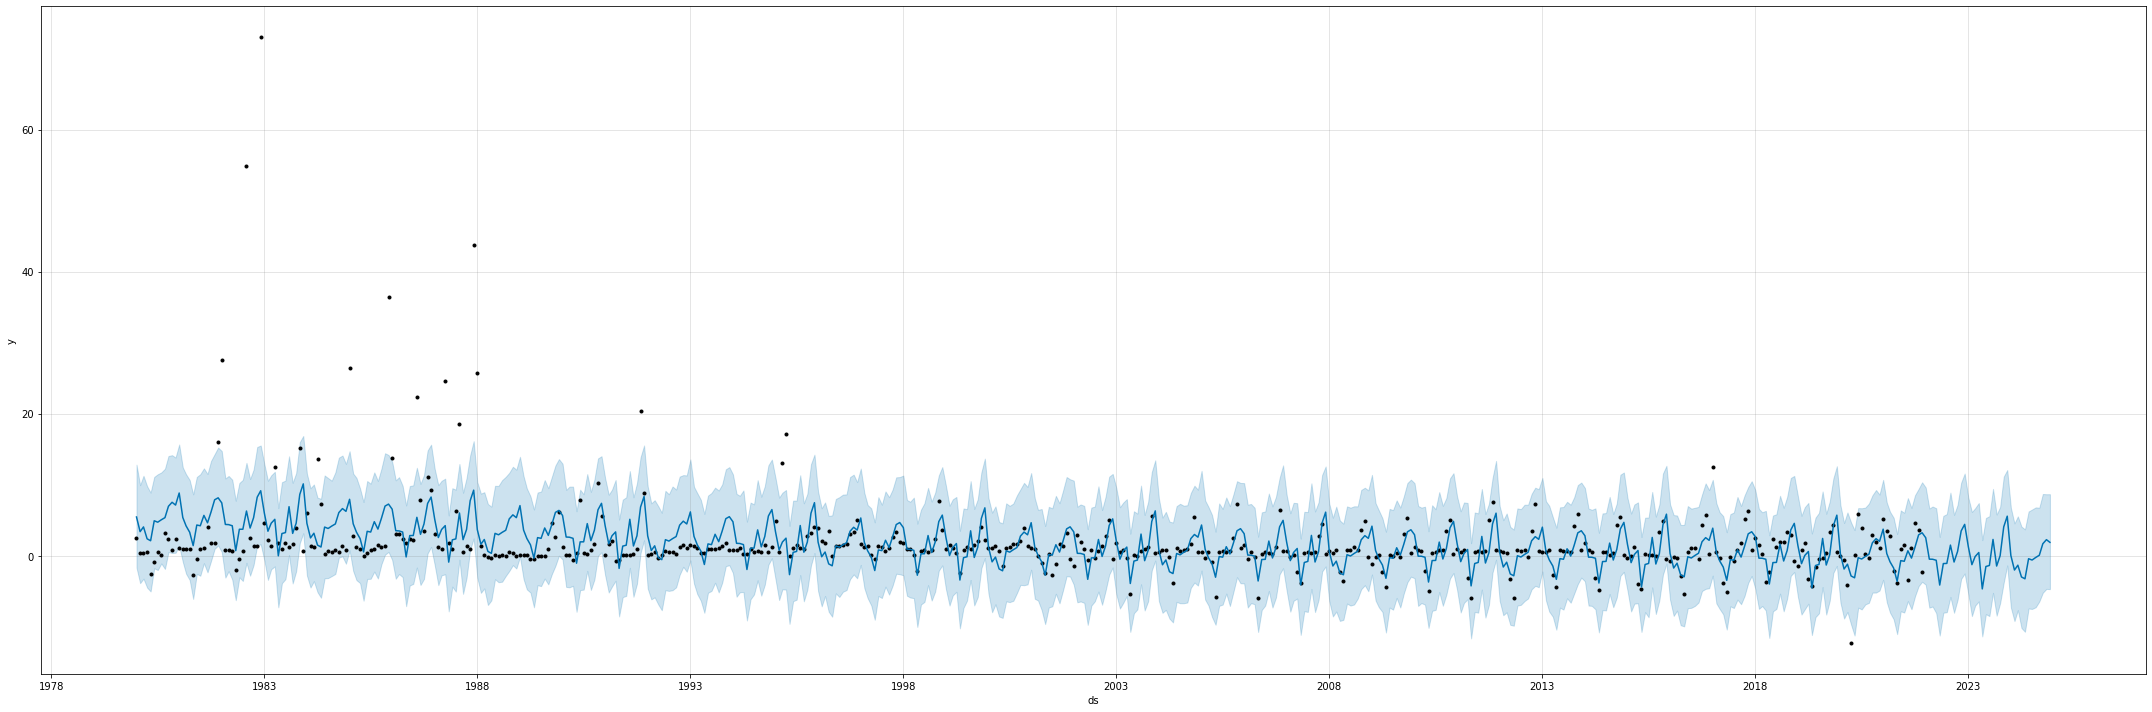

In [21]:
m.plot(forecast, figsize=(30,10));

In [22]:
pd.plotting.register_matplotlib_converters()

(736695.0, 739221.0)

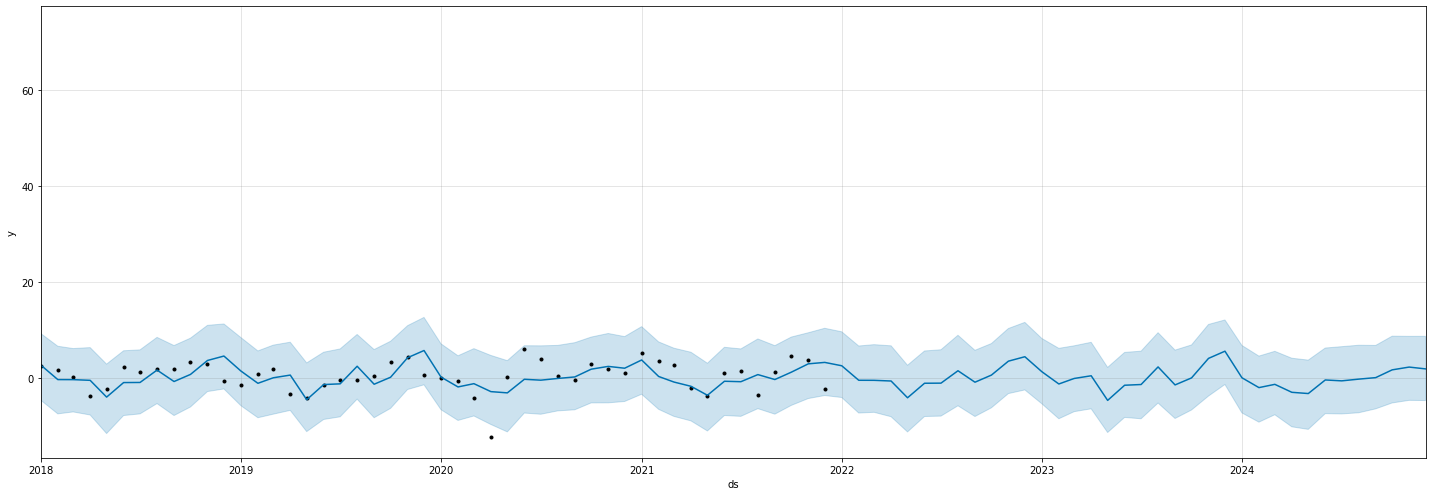

In [23]:
import matplotlib.pyplot as plt

m.plot(forecast, figsize=(20,7))
plt.xlim('2018-01-01','2024-12-01')

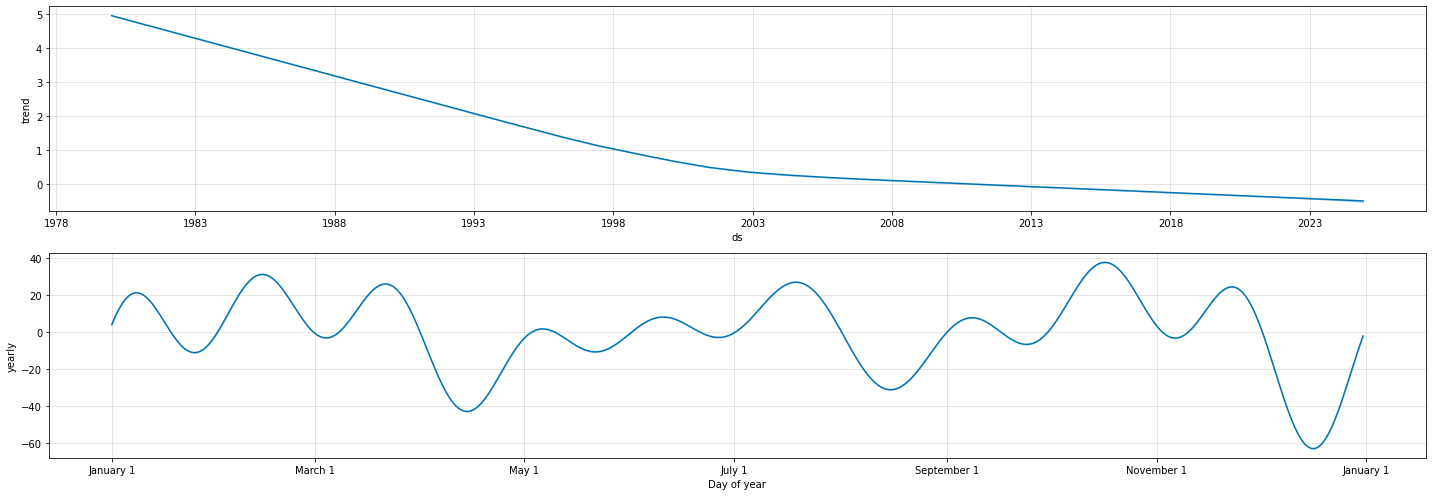

In [24]:
m.plot_components(forecast, figsize=(20,7));